# Imports

In [5]:
import os
from PIL import Image
import shutil
import random

In [9]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
import secrets

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Spliting images for aes ecb and tdes ecb

In [6]:
def split_dataset(input_dir, output_dir1, output_dir2, split_ratio):
    # Get the list of image files in the input directory
    image_files = [f for f in os.listdir(input_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

    # Shuffle the list of files for randomness (optional)
    random.shuffle(image_files)

    # Calculate the split index
    split_index = int(len(image_files) * split_ratio)

    # Split the list into two parts
    first_part = image_files[:split_index]
    second_part = image_files[split_index:]

    # Copy or move the files to the output directories
    copy_files(first_part, input_dir, output_dir1)
    copy_files(second_part, input_dir, output_dir2)

def copy_files(file_list, source_dir, dest_dir):
    for file in file_list:
        source_path = os.path.join(source_dir, file)
        dest_path = os.path.join(dest_dir, file)
        shutil.copy(source_path, dest_path)  # Use shutil.move if you want to move instead of copy

In [7]:
input_directory = "./data/images"
output_directory1 = "./data/train/AES/ECB/Non_Enc/"
output_directory2 = "./data/train/TDES/ECB/Non_Enc/"
split_rat = 0.5

# Make sure the output directories exist
os.makedirs(output_directory1, exist_ok=True)
os.makedirs(output_directory2, exist_ok=True)

# Split the dataset
split_dataset(input_directory, output_directory1, output_directory2, split_rat)

# Reshape Image

In [8]:
path = './data/Train/AES/ECB/Non_Enc/'

image_files = [f for f in os.listdir('./data/Train/AES/ECB/Non_Enc/') if f.endswith(('.jpg', '.png', '.jpeg'))]

for img_name in image_files:
    read_path = os.path.join(path, img_name)
    image = Image.open(read_path)
    new_image = image.resize((64,64))
    new_image.save('./data/Train/AES/ECB/Img_Non_Enc/' + img_name)

# Encrypting Images

In [10]:
def getKey(keysize):

    key = secrets.token_bytes(keysize)
    return key

In [33]:
def aes_ecb_encrypt_image(filename, filepath, key):

    B_size = 16

    encrypted_filename ="AES_ECB_Enc_" + filename
    encrypted_filepath = os.path.join('./data/Train/AES/ECB/AES_ECB_Enc', "AES_ECB_Enc_" + filename)

    with open(filepath, "rb") as file1:
        data = file1.read()

        cipher = AES.new(key, AES.MODE_ECB)
        ciphertext = cipher.encrypt(pad(data, B_size))


        with open(encrypted_filepath, "wb") as file2:
            file2.write(ciphertext)

    return encrypted_filename

In [34]:
KEYSIZE = 16

path = './data/Train/AES/ECB/Img_Non_Enc/'

image_files = [f for f in os.listdir('./data/Train/AES/ECB/Img_Non_Enc/') if f.endswith(('.jpg', '.png', '.jpeg'))]

for img_name in image_files:
    key = getKey(KEYSIZE)

    read_path = path + img_name

    encrypted_filename = aes_ecb_encrypt_image(img_name, read_path, key)

    print("Enc File Name:", encrypted_filename, "Key:", key)

    # Save the details to a file
    with open('./data/Train/AES/ECB/Encryption_details/Encryption_details.txt', 'a') as file:
        file.write(f"Image File: {img_name}, Encrypted File: {encrypted_filename}, Key: {key}\n")

Enc File Name: AES_ECB_Enc_Eight_full (104).jpg Key: b'8\xfe\x9f\xb4\xc8\x00\x81\x1dD\xbcM\xffPm\x82d'
Enc File Name: AES_ECB_Enc_Eight_full (107).jpg Key: b'W\x83%\xf8a\xa0C\x90/\x8fSK\xcf\x057\xb7'
Enc File Name: AES_ECB_Enc_Eight_full (108).jpg Key: b'e~-s\xa8\xafOO\xe01&\x84m\xa4\x85$'
Enc File Name: AES_ECB_Enc_Eight_full (109).jpg Key: b'z\xb0\xb6\n\x1a\xca\xf8\xb2\xd6\xcf\x10s\x80\x07\x98\xdd'
Enc File Name: AES_ECB_Enc_Eight_full (11).jpg Key: b"\xc9\xa7>C'\xf7\x9d\x8bd\x01\xdd\xeb\xfa\xfe1n"
Enc File Name: AES_ECB_Enc_Eight_full (111).jpg Key: b'\xaa\x06]\xe3\xc1\xf3\xbd\xa4\x9d\xc6\x0f_+\x1a\xca\t'
Enc File Name: AES_ECB_Enc_Eight_full (112).jpg Key: b'Cq\xe0/\x86JY\x16\x93\x93\rB\xa8(a\x93'
Enc File Name: AES_ECB_Enc_Eight_full (114).jpg Key: b'\xa5\xcc]\x01\xa3&\x81}\xc9\xdc\x07\x150%\xab\xd5'
Enc File Name: AES_ECB_Enc_Eight_full (115).jpg Key: b'O\xb2 \xac?\xea\xcc\xe6\xf1\xb53\xa88\xff\x11"'
Enc File Name: AES_ECB_Enc_Eight_full (117).jpg Key: b'\xfe\x1dJ\xee\x1fM5\xd7HV

# Decrypting Images

In [35]:
def aes_ecb_decrypt_image(filename, key):
    B_size = 16
    decrypted_filename = "AES_Dec_" + filename
    decrypted_filepath = os.path.join('./data/Train/AES/ECB/AES_ECB_Dec', "Dec_" + filename)

    with open('./data/Train/AES/ECB/AES_ECB_Enc/' + filename, "rb") as file1:
        data = file1.read()

        cipher2 = AES.new(key, AES.MODE_ECB)  # Use AES.MODE_ECB for ECB mode
        decrypted_data = unpad(cipher2.decrypt(data), B_size)

        with open(decrypted_filepath, "wb") as file2:
            file2.write(decrypted_data)

    return decrypted_filename

In [36]:
# Input for the file to decrypt
filename_to_decrypt = 'AES_ECB_Enc_Eight_full (104).jpg'

# Input for the key
key = b'8\xfe\x9f\xb4\xc8\x00\x81\x1dD\xbcM\xffPm\x82d'

# Decrypt the image using user-provided inputs
decrypted_filename = aes_ecb_decrypt_image(filename_to_decrypt, key)

print("Decrypted File Name:", decrypted_filename)

Decrypted File Name: AES_Dec_AES_ECB_Enc_Eight_full (104).jpg


# Visualising image before encryption, after encryption and after decryption

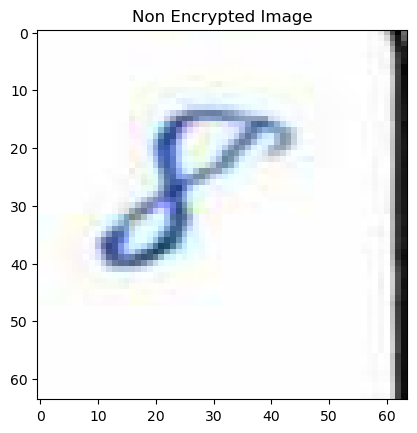

(64, 64, 3)


In [38]:
image_path = './data/Train/AES/ECB/Img_Non_Enc/Eight_full (104).jpg'
image = plt.imread(image_path)
plt.imshow(image)
plt.title('Non Encrypted Image')
plt.show()
print(image.shape)

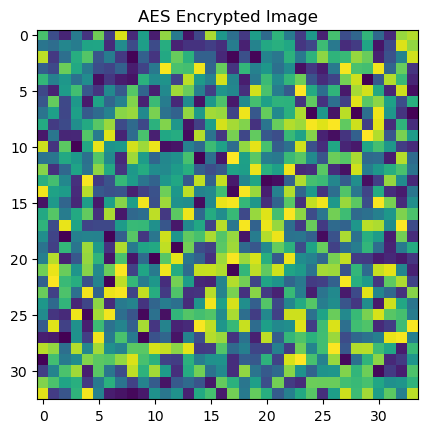

(33, 34)


In [39]:
image_path = './data/Train/AES/ECB/AES_ECB_Enc/AES_ECB_Enc_Eight_full (104).jpg'

# Read the image file as a binary file
with open(image_path, 'rb') as file:
    encrypted_data = file.read()

# Convert binary data to a NumPy array of integers
encrypted_array = np.frombuffer(encrypted_data, dtype=np.uint8)

# Reshape the array into a 2D array for visualization
height = int(np.sqrt(len(encrypted_array)))
width = len(encrypted_array) // height
encrypted_image = encrypted_array[:height * width].reshape((height, width))

# Display the encrypted image as grayscale
plt.imshow(encrypted_image)
plt.title('AES Encrypted Image')
plt.show()
print(encrypted_image.shape)

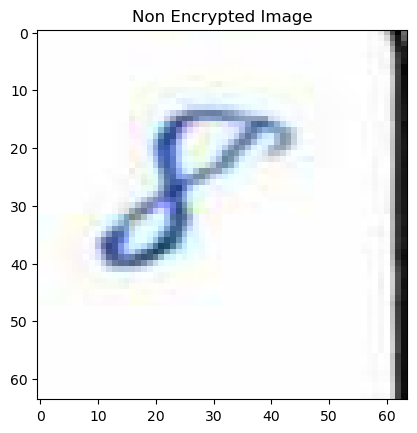

(64, 64, 3)


In [40]:
image_path = './data/Train/AES/ECB/AES_ECB_Dec/Dec_AES_ECB_Enc_Eight_full (104).jpg'
image = plt.imread(image_path)
plt.imshow(image)
plt.title('Non Encrypted Image')
plt.show()
print(image.shape)

# Saving reshaped encrypted image

In [41]:
path = './data/Train/AES/ECB/AES_ECB_Enc/'
output_path = './data/Train/AES/ECB/Enc_Img_Readable/'

image_files = [f for f in os.listdir(path) if f.endswith(('.jpg', '.png', '.jpeg'))]

for img_name in image_files:
    # Read the image file as a binary file
    image_path = os.path.join(path, img_name)
    with open(image_path, 'rb') as file:
        encrypted_data = file.read()
    
    # Convert binary data to a NumPy array of integers
    encrypted_array = np.frombuffer(encrypted_data, dtype=np.uint8)

    # Reshape the array into a 2D array for visualization
    height = int(np.sqrt(len(encrypted_array)))
    width = len(encrypted_array) // height
    encrypted_image = encrypted_array[:height * width].reshape((height, width))

    # Convert NumPy array back to image and save it
    reshaped_image = Image.fromarray(encrypted_image)
    output_image_path = os.path.join(output_path, f"reshaped_{img_name}")
    reshaped_image.save(output_image_path)